## Observations and Insights 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [2]:
# Generate lists of column headers for each csv file

mouse_metadata.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)'], dtype='object')

In [3]:
study_results.columns

Index(['Mouse ID', 'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'], dtype='object')

In [4]:
# Combine the data into a single dataset
mouse_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")
mouse_data
mouse_data.head()

# Display the data table for preview

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [5]:
# Checking the number of mice.
# Get a count of the number of unique 'Mouse ID's

unique_mouse_count = len(mouse_data["Mouse ID"].unique())
print(f"The number of unique Mouse IDs in this raw, merged data set is  {unique_mouse_count}")


The number of unique Mouse IDs in this raw, merged data set is  249


In [6]:
# Print the number of rows in the raw, merged data set
mouse_data.count()


Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [7]:
# Getting the duplicate mice by ID number.
# First, sort the dataset by MouseID and Timepoint
mouse_data_sorted = mouse_data.sort_values(by=["Mouse ID", "Timepoint"])
mouse_data_sorted


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [8]:
# Reset the index of mouse_data_sorted. I'm not sure why the index started at 454 after I sorted it.
mouse_data_sorted.reset_index(drop=True, inplace=True)
mouse_data_sorted

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,0,45.000000,0
1,a203,Infubinol,Female,20,23,5,48.508468,0
2,a203,Infubinol,Female,20,23,10,51.852437,1
3,a203,Infubinol,Female,20,23,15,52.777870,1
4,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [9]:
# Identify any cases where more than one row has the same Mouse ID and Timepoint. Create a new dataframe with this boolean variable.
mouse_data_duplicated = mouse_data_sorted.duplicated(subset=None, keep='first')
mouse_data_duplicated = mouse_data_duplicated.to_frame()
mouse_data_duplicated = mouse_data_duplicated.rename(columns= {0: 'duplicated'})

mouse_data_duplicated

,duplicated
0,False
1,False
2,False
3,False
4,False
...,...
1888,False
1889,False
1890,False
1891,False


In [10]:
# Merge the two dataframes so that now any duplicated data is labeled.
mouse_data_master = mouse_data_sorted.join(mouse_data_duplicated)
mouse_data_master
mouse_data_master.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
0,a203,Infubinol,Female,20,23,0,45.000000,0,False
1,a203,Infubinol,Female,20,23,5,48.508468,0,False
2,a203,Infubinol,Female,20,23,10,51.852437,1,False
3,a203,Infubinol,Female,20,23,15,52.777870,1,False
4,a203,Infubinol,Female,20,23,20,55.173336,1,False


In [11]:
# List the unique Mouse IDs of all rows where duplicated=True
# Identify the Mouse IDs that correspond with duplicated=True
filtered_master = mouse_data_master[(mouse_data_master['duplicated']==True)]
filtered_master


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
587,g989,Propriva,Female,21,26,0,45.0,0,True


In [12]:
# Only one mouse has duplicated data in the mouse_data_master, and that is the mouse with ID# g989.

# Delete from mouse_data_master all rows with Mouse ID g989





In [13]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse = mouse_data_master[(mouse_data_master['Mouse ID']=='g989')]
duplicated_mouse


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
586,g989,Propriva,Female,21,26,0,45.000000,0,False
587,g989,Propriva,Female,21,26,0,45.000000,0,True
588,g989,Propriva,Female,21,26,5,48.786801,0,False
589,g989,Propriva,Female,21,26,5,47.570392,0,False
590,g989,Propriva,Female,21,26,10,51.745156,0,False
591,g989,Propriva,Female,21,26,10,49.880528,0,False
592,g989,Propriva,Female,21,26,15,51.325852,1,False
593,g989,Propriva,Female,21,26,15,53.442020,0,False
594,g989,Propriva,Female,21,26,20,55.326122,1,False
595,g989,Propriva,Female,21,26,20,54.657650,1,False


In [14]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_master.drop(mouse_data_master[mouse_data_master['Mouse ID']=='g989'].index, inplace=True)
mouse_data_master

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
0,a203,Infubinol,Female,20,23,0,45.000000,0,False
1,a203,Infubinol,Female,20,23,5,48.508468,0,False
2,a203,Infubinol,Female,20,23,10,51.852437,1,False
3,a203,Infubinol,Female,20,23,15,52.777870,1,False
4,a203,Infubinol,Female,20,23,20,55.173336,1,False
...,...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2,False
1889,z969,Naftisol,Male,9,30,30,65.841013,3,False
1890,z969,Naftisol,Male,9,30,35,69.176246,4,False
1891,z969,Naftisol,Male,9,30,40,70.314904,4,False


In [15]:
# Checking the number of mice in the clean DataFrame. (The original unique # of mice was 249)
unique_mouse_count = len(mouse_data_master["Mouse ID"].unique())
print(f"The number of unique Mouse IDs in this raw, merged data set is  {unique_mouse_count}")

The number of unique Mouse IDs in this raw, merged data set is  248


In [16]:
mouse_data_master.to_csv("MouseDataMaster.csv", sep=',')

## Summary Statistics

In [17]:
# # Remove any rows with missing data
clean_master = mouse_data_master.dropna(how="any")
clean_master.count()

# # Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# # I would think you wouldn't want the summary statistics to be calculated for all of the data in the dataset, but rather,
# # calculated at a specified Timepoint (e.g. day 45).

# # I am going to return a dataset with ONLY entries from Timepoint = 45.


clean_master.drop(clean_master[clean_master['Timepoint']!=45].index, inplace=True)
clean_master




,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
9,a203,Infubinol,Female,20,23,45,67.973419,2,False
19,a251,Infubinol,Female,21,25,45,65.525743,1,False
29,a262,Placebo,Female,17,29,45,70.717621,4,False
39,a275,Ceftamin,Female,20,28,45,62.999356,3,False
56,a401,Zoniferol,Female,8,25,45,66.794156,4,False
...,...,...,...,...,...,...,...,...,...
1845,y865,Ceftamin,Male,23,26,45,64.729837,3,False
1862,z578,Ramicane,Male,11,16,45,30.638696,0,False
1872,z581,Infubinol,Female,24,25,45,62.754451,3,False
1882,z795,Naftisol,Female,13,29,45,65.741070,3,False


In [18]:
# # Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 

grouped_mouse_data_regimen = mouse_data_master.groupby(['Drug Regimen'])
print(grouped_mouse_data_regimen)
grouped_mouse_data_regimen.count().head()

,Mouse ID,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
Drug Regimen,,,,,,,,
Capomulin,230,230,230,230,230,230,230,230
Ceftamin,178,178,178,178,178,178,178,178
Infubinol,178,178,178,178,178,178,178,178
Ketapril,188,188,188,188,188,188,188,188
Naftisol,186,186,186,186,186,186,186,186


In [19]:
# # mean, median, variance, standard deviation, and SEM of the tumor volume (this is for all tumor volume measurements 
# at all timepoints)
mean_tumor_by_regimen = grouped_mouse_data_regimen["Tumor Volume (mm3)"].mean()
mean_tumor_by_regimen

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [20]:
median_tumor_by_regimen = grouped_mouse_data_regimen["Tumor Volume (mm3)"].median()
median_tumor_by_regimen

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [21]:
variance_tumor_by_regimen = grouped_mouse_data_regimen["Tumor Volume (mm3)"].var()
variance_tumor_by_regimen

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [22]:
std_tumor_by_regimen = grouped_mouse_data_regimen["Tumor Volume (mm3)"].std()
std_tumor_by_regimen

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [23]:
sem_tumor_by_regimen = grouped_mouse_data_regimen["Tumor Volume (mm3)"].sem()
sem_tumor_by_regimen

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [24]:
# # Assemble the resulting series into a single summary dataframe.
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

regimen_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_by_regimen,
                                "Median Tumor Volume": median_tumor_by_regimen,
                                "Variance of Tumor Volume": variance_tumor_by_regimen,
                                "Standard Deviation of Tumor Volume": std_tumor_by_regimen,
                                "SEM of Tumor Volume": sem_tumor_by_regimen})
regimen_summary.head()

,Mean Tumor Volume,Median Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [25]:
# Using the aggregation method, produce the same summary statistics in a single line

In [26]:
# The above statistics were calculated from a dataset including ALL tumor volume measurements at ALL timepoints. 
# The count of these measurements by drug regimen is listed below.
regimen_summary_all = mouse_data_master["Drug Regimen"].value_counts()
regimen_summary_all

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

In [58]:
# I also created a dataset (see above) for tumor measurements only at timepoint=45
regimen_summary_endTime = clean_master["Drug Regimen"].value_counts()
regimen_summary_endTime

Capomulin    21
Ramicane     20
Zoniferol    14
Ceftamin     13
Naftisol     13
Stelasyn     11
Ketapril     11
Placebo      11
Infubinol     9
Propriva      7
Name: Drug Regimen, dtype: int64

## Bar and Pie Charts

In [28]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
regimen_summary_all = mouse_data_master["Drug Regimen"].value_counts()
regimen_summary_all


Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Ceftamin     178
Infubinol    178
Propriva     148
Name: Drug Regimen, dtype: int64

([<matplotlib.axis.XTick at 0x7fc7a91c94e0>,
 <a list of 10 Text xticklabel objects>)

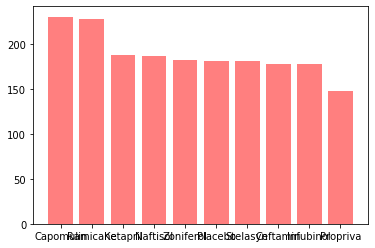

In [29]:
regimen = [230, 228, 188, 186, 182, 181, 181, 178, 178, 148]
x_axis = np.arange(len(regimen))
plt.bar(x_axis, regimen, color='r', alpha=.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Placebo", "Stelasyn", "Ceftamin", "Infubinol", "Propriva"])

KeyError: 0

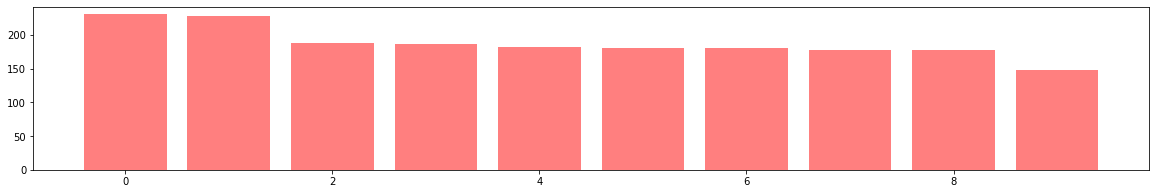

In [62]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

regimen_summary_all = regimen_summary_all.rename(columns= {'Drug Regimen': 'Total Timepoints'})
regimen_summary_all

plt.figure(figsize=(20,3))
plt.bar(x_axis, regimen_summary_all["Total Timepoints"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, regimen_summary_all[0], rotation="vertical")

([<matplotlib.patches.Wedge at 0x7fc7a96e3198>,
 [Text(-0.6802492607924953, -0.8644425621122921, 'Male'),
  Text(0.6802492607924954, 0.864442562112292, 'Female')],
 [Text(-0.371045051341361, -0.4715141247885229, '51.0%'),
  Text(0.37104505134136107, 0.47151412478852284, '49.0%')])

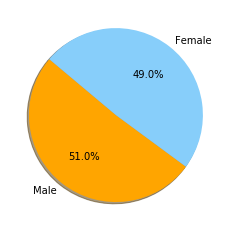

In [71]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
# mouse_data_master "Male" "Female"
master_gender = mouse_data_master.set_index("Mouse ID")
master_gender.head()

count = master_gender["Sex"].value_counts("Mouse ID")
count

# Labels for the sections of our pie chart
labels = ["Male", "Female"]

# The values of each section of the pie chart
sizes = [51, 49]

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

explode = (0, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)



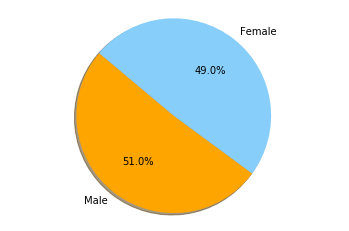

In [72]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

count = master_gender["Sex"].value_counts("Mouse ID")
count

# Labels for the sections of our pie chart
sexes = ["Male", "Female"]

# The values of each section of the pie chart
percent_of_population = [51, 49]

# The colors of each section of the pie chart
colors = ["orange", "lightskyblue"]

explode = (0, 0)

plt.pie(percent_of_population, explode=explode, labels=sexes, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
# Create axes which are equal so we have a perfect circle
plt.axis("equal")
# Save an image of our chart and print the final product to the screen
plt.savefig("../Images/PopBySex.png")
plt.show()

## Quartiles, Outliers and Boxplots

In [60]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
# clean_master is the dataframe I created - This is the dataframe that shows the tumor volume on day 45 only for each
# mouse that had a measurement at day 45.
clean_master.head()


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,duplicated
9,a203,Infubinol,Female,20,23,45,67.973419,2,False
19,a251,Infubinol,Female,21,25,45,65.525743,1,False
29,a262,Placebo,Female,17,29,45,70.717621,4,False
39,a275,Ceftamin,Female,20,28,45,62.999356,3,False
56,a401,Zoniferol,Female,8,25,45,66.794156,4,False


In [79]:
# # Put treatments into a list for for loop (and later for plot labels)
# drug_regimen = clean_master["Drug Regimen"].tolist()

# # Create empty list to fill with tumor vol data (for plotting)
# tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# For each row where Drug Regimen == Capomulin, print out the value at Tumor Volume.

# Try to isolate only the rows of interest:
test_regimens = clean_master.loc[clean_master["Drug Regimen"] == "Capomulin", "Ramicane", "Infubinol", "Ceftamin", [
    "Mouse ID", "Drug Regimen", "Tumor Volume (mm3)"]]
test_regimens.head()

    

IndexingError: Too many indexers

In [ ]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # We want to get the tumor volume for rows where Drug Regimen = Capomulin, Ramicane, Infubinol, or Ceftamin


    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

In [35]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [36]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [37]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [38]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
